<a href="https://colab.research.google.com/github/Manishpatil7975/AIML_ASSIGNMENTS/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Wholesale_Customers_Data.csv')
print(df.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [12]:
# Check and fill missing values (if any)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Convert 'Channel' and 'Region' to categorical
df['Channel'] = df['Channel'].astype(str)
df['Region'] = df['Region'].astype(str)
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [13]:
# Step 3: Feature Engineering
df['Total_Spending'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
                           'Detergents_Paper', 'Delicassen']].sum(axis=1)

print("\n🆕 New feature 'Total_Spending' added. First 5 values:")
print(df['Total_Spending'].head())



🆕 New feature 'Total_Spending' added. First 5 values:
0    34112
1    33266
2    36610
3    27381
4    46100
Name: Total_Spending, dtype: int64


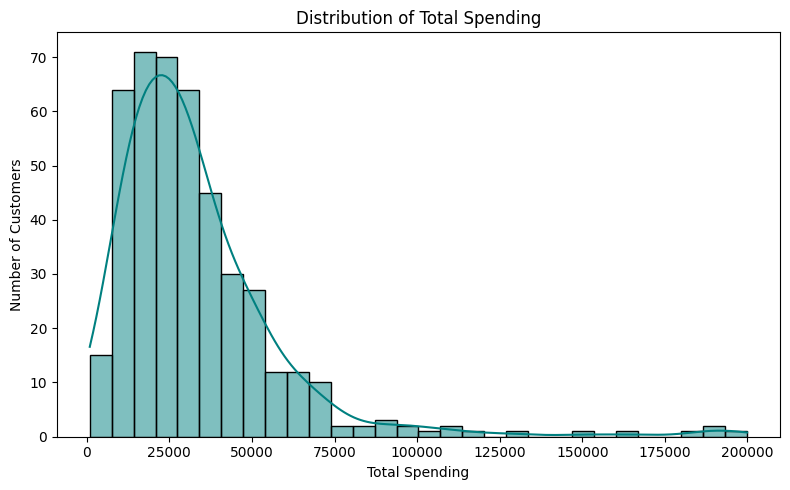

In [14]:
# Step 4: Visualization 1 - Total Spending Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Spending'], bins=30, kde=True, color='teal')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-1973769434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Channel', y='Total_Spending', data=df, palette='pastel')


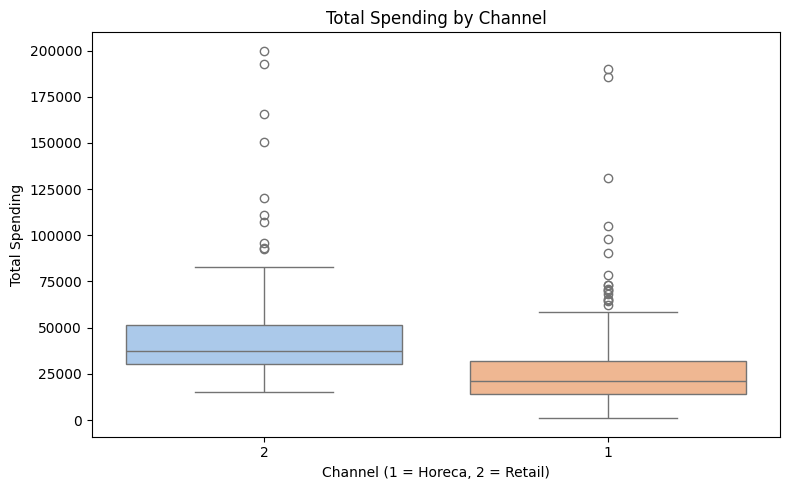

In [15]:
# Step 5: Visualization 2 - Boxplot by Channel
plt.figure(figsize=(8, 5))
sns.boxplot(x='Channel', y='Total_Spending', data=df, palette='pastel')
plt.title('Total Spending by Channel')
plt.xlabel('Channel (1 = Horeca, 2 = Retail)')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

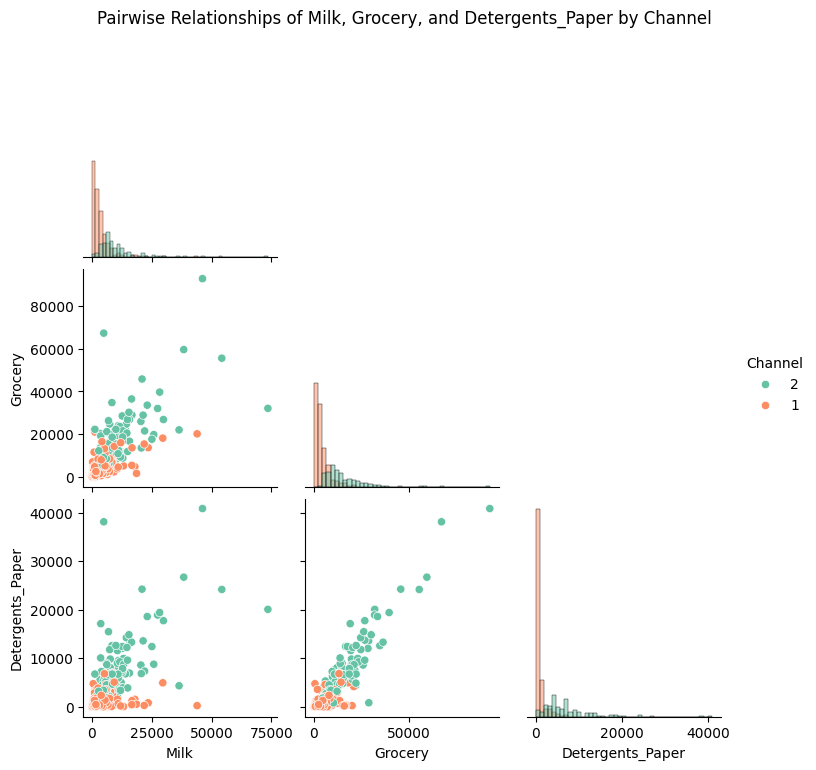

In [16]:
# Using Channel as hue; plotting 3 spend categories
plot_cols = ['Milk', 'Grocery', 'Detergents_Paper']
# Make sure Channel is string for hue distinction
df['Channel'] = df['Channel'].astype(str)
sns.pairplot(df[plot_cols + ['Channel']],
             hue='Channel',
             palette='Set2',
             diag_kind='hist',
             corner=True)
plt.suptitle("Pairwise Relationships of Milk, Grocery, and Detergents_Paper by Channel", y=1.02)
plt.show()